In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mesa import Agent, Model
from mesa.datacollection import DataCollector
from mesa.time import BaseScheduler, RandomActivation

from model_classes import ContentMarketModel
from scheduler import AlternatingScheduler

Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing influencer allocation
Step 0:
  Updated member 0
Step 1:
  Updated member 1
Step 2:
  Updated member 2
Step 3:
  Updated member 3
Step 4:
  Updated member 4
Step 5:
  Updated influencer
St

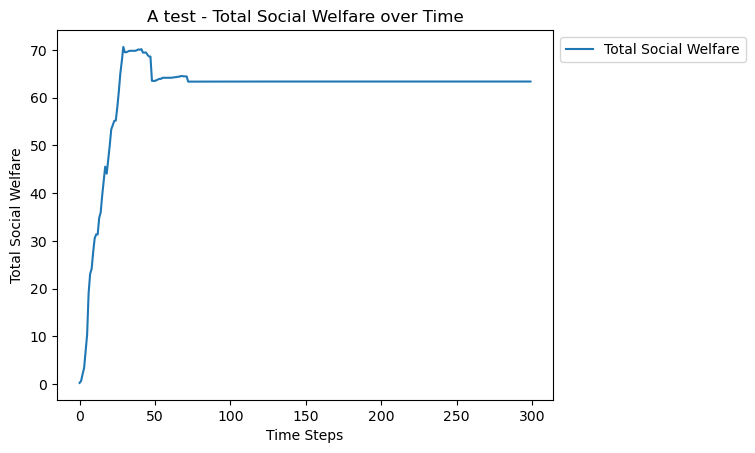

In [5]:
"""
TESTING CELL
"""
import numpy as np
from model_classes import ContentMarketModel, InfoAccessEnum
import matplotlib.pyplot as plt

# Ensure results are reproducible
np.random.seed(0)

num_steps = 300

default_min_params = {
    'method': 'SLSQP',
}

default_params = {
    'num_members': 25,          # Number of community members
    'M': 5.0,                   # Rate budget for consumer
    'M_INFL': 25.0,             # Rate limit for influencer
    'info_access': InfoAccessEnum.LIMITED_MANUAL,         # Perfect information or not
    'verbose': True, 
    'infl_update_frequency': 5, # How many times member updates before an influencer updates
    'B_0': 0.5,                 # Prob. that content produced from outside sources is of interest to content consumers
    'ALPHA': 1.0,               # Delay sensitivity for content consumers
    'R_P': 1.0,                 # Rate at which content producers create new content
    'R_0': 1.0,                 # Rate at which sources outside the community create new content
}

default_f = lambda x: np.exp(-x)
default_g = default_f

default_main_topics = np.random.rand(default_params['num_members'])
default_prod_topics = np.random.rand(default_params['num_members'])
default_infl_alloc = np.random.rand(default_params['num_members'])
default_mems_alloc = np.random.rand(default_params['num_members'], default_params['num_members'] + 2)

params = default_params.copy()
min_params = default_min_params.copy()

main_topics = default_main_topics.copy()
prod_topics = default_prod_topics.copy()
infl_alloc = default_infl_alloc.copy()
mems_alloc = default_mems_alloc.copy()

model = ContentMarketModel(
    params = params,
    main_topics = main_topics,
    prod_topics = prod_topics,
    infl_alloc = infl_alloc,
    mems_alloc = mems_alloc,
    min_params = min_params,
    f = default_f,
    g = default_g
)

for i in range(num_steps):
    model.step()

agent_df = model.datacollector.get_agent_vars_dataframe()
model_df = model.datacollector.get_model_vars_dataframe()

plt.plot(model_df["Total Social Welfare"], label = "Total Social Welfare")
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("A test - Total Social Welfare over Time")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Perfect information: PERFECT
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing influencer allocation
Perfect information: LIMITED_AUTO
Normalizing consumer allocation
Normalizing consumer allocation
Normalizing consumer allocation
Normali

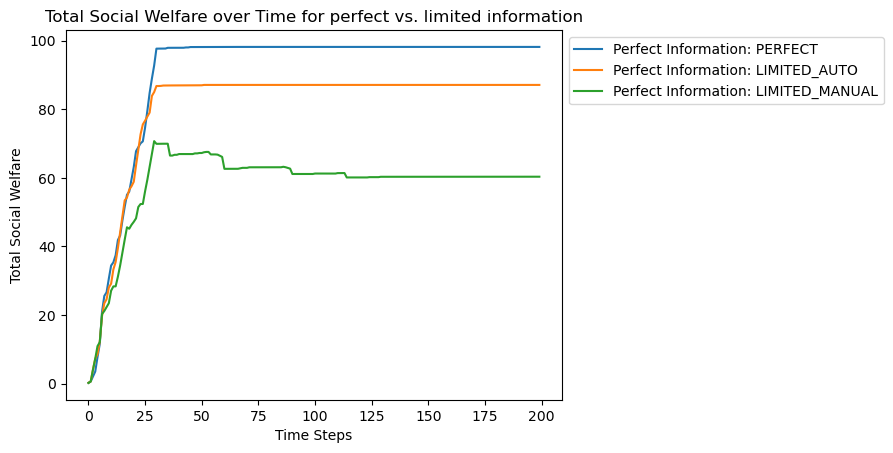

In [6]:
"""
VARYING PERFECT VS. LIMITED INFO
"""

np.random.seed(0)
num_steps = 200

params = default_params.copy()
min_params = default_min_params.copy()

for t in [info.value for info in InfoAccessEnum]:
    print(f"Perfect information: {InfoAccessEnum(t).name}")

    params['info_access'] = t
    params['num_members'] = 25
    params['verbose'] = False

    main_topics = np.random.rand(params['num_members'])
    prod_topics = np.random.rand(params['num_members'])
    infl_alloc = np.random.rand(params['num_members'])
    mems_alloc = np.random.rand(params['num_members'], params['num_members'] + 2)

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"Perfect Information: {InfoAccessEnum(t).name}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for perfect vs. limited information")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with 5 community members
Modelling with 10 community members
Modelling with 20 community members
Modelling with 40 community members
Modelling with 70 community members
Modelling with 100 community members
Modelling with 120 community members
Modelling with 140 community members


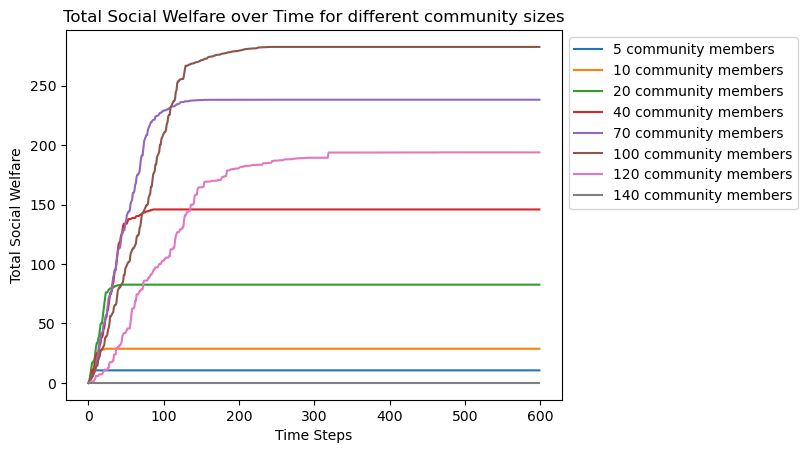

In [3]:
"""
VARYING COMMUNITY MEMBERS
"""

np.random.seed(0)
num_steps = 600

params = default_params.copy()
min_params = default_min_params.copy()

for n in [5, 10, 20, 40, 70, 100, 120, 140]:
    print(f"Modelling with {n} community members")

    params['num_members'] = n

    main_topics = np.random.rand(n)
    prod_topics = np.random.rand(n)
    infl_alloc = np.random.rand(n)
    mems_alloc = np.random.rand(n, n + 2)

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"{n} community members")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different community sizes")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with a influencer rate budget of 10.0 and consumer rate budget 10.0
Modelling with a influencer rate budget of 50.0 and consumer rate budget 10.0
Modelling with a influencer rate budget of 100.0 and consumer rate budget 10.0
Modelling with a influencer rate budget of 250.0 and consumer rate budget 10.0
Modelling with a influencer rate budget of 500.0 and consumer rate budget 10.0


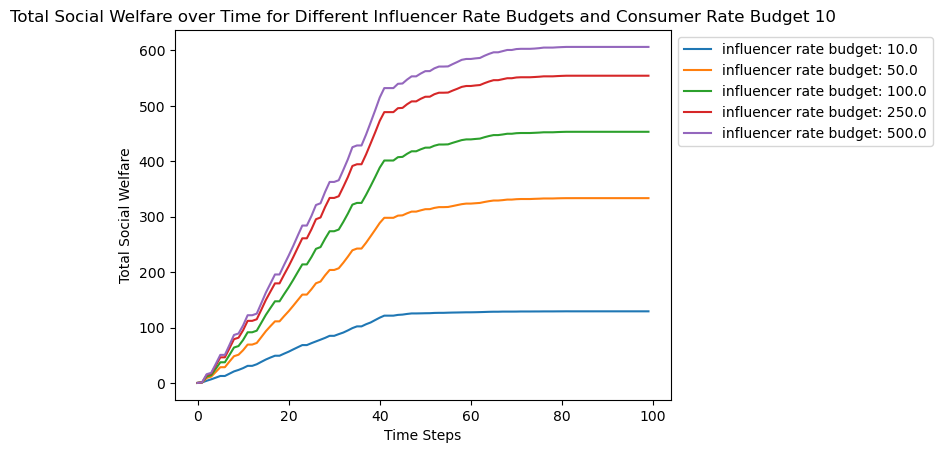

In [24]:
"""
VARYING INFLUENCER RATE BUDGETS
"""
np.random.seed(0)
num_steps = 100

params = default_params.copy()

for n in [1, 5, 10, 25, 50]:
    params['M'] = 10.0
    params['M_INFL'] = n * params['M']

    print(f"Modelling with a influencer rate budget of {params['M_INFL']} and consumer rate budget {params['M']}")

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"influencer rate budget: {params['M_INFL']}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for Different Influencer Rate Budgets and Consumer Rate Budget 10")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.show()


Modelling with a influencer/consumer rate budget ratio of 1, M_INFL = 1.3888888888888888, M = 1.3888888888888888
Modelling with a influencer/consumer rate budget ratio of 5, M_INFL = 6.25, M = 1.25
Modelling with a influencer/consumer rate budget ratio of 10, M_INFL = 11.11111111111111, M = 1.1111111111111112
Modelling with a influencer/consumer rate budget ratio of 25, M_INFL = 20.833333333333336, M = 0.8333333333333334
Modelling with a influencer/consumer rate budget ratio of 50, M_INFL = 29.411764705882355, M = 0.5882352941176471


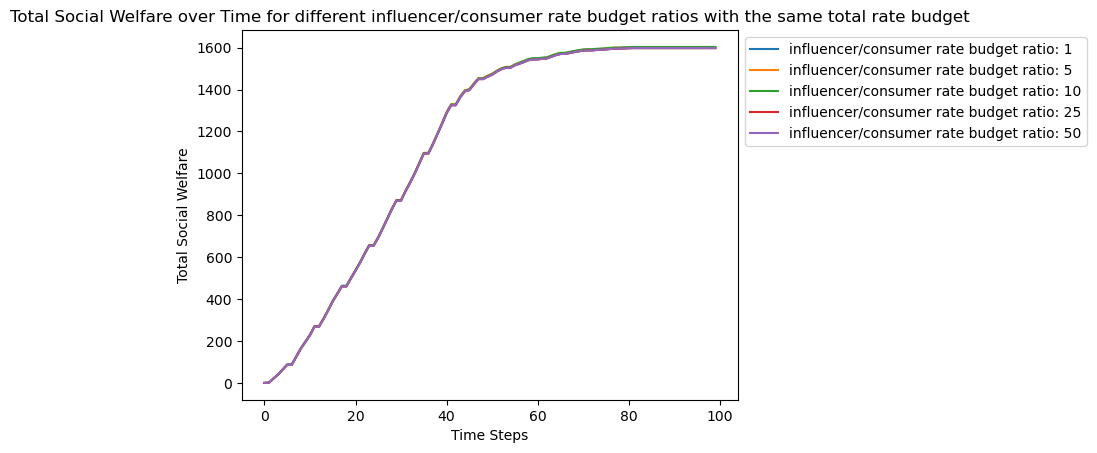

In [28]:
"""
VARYING RATE BUDGET RATIOS
"""
np.random.seed(0)
num_steps = 100

params = default_params.copy()

total_infl = 50.0

for n in [1, 5, 10, 25, 50]:
    params['M_INFL'] = total_infl * (n/(n+params['num_members']))
    params['M'] = total_infl * (1/(n+params['num_members']))

    print(f"Modelling with a influencer/consumer rate budget ratio of {n}, M_INFL = {params['M_INFL']}, M = {params['M']}")

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()
    
    params['M_INFL'] = total_infl * (n/n+params['num_members'])
    params['M'] = total_infl * (params['num_members']/n+params['num_members'])

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"influencer/consumer rate budget ratio: {n}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different influencer/consumer rate budget ratios with the same total rate budget")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


Modelling while updating influencer every 1 updates for agents
Modelling while updating influencer every 2 updates for agents
Modelling while updating influencer every 3 updates for agents
Modelling while updating influencer every 5 updates for agents
Modelling while updating influencer every 10 updates for agents
Modelling while updating influencer every 25 updates for agents
Modelling while updating influencer every 50 updates for agents


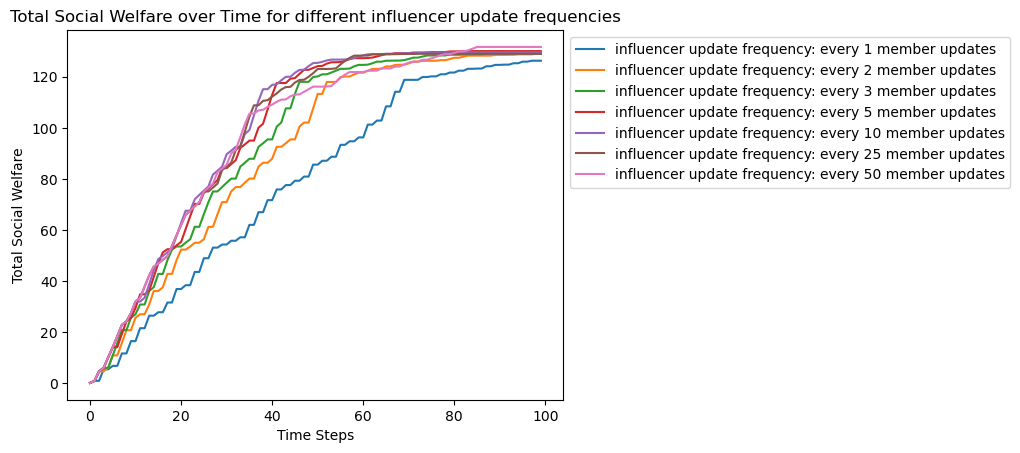

In [5]:
"""
VARYING INFLUENCER UPDATE FREQUENCIES
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [1, 2, 3, 5, 10, 25, 50]:
    print(f"Modelling while updating influencer every {n} updates for agents")

    params['influencer_update_frequency'] = n

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"influencer update frequency: every {n} member updates")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different influencer update frequencies")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with probability function: f = g = exp(-0.1x)
Modelling with probability function: f = g = exp(-0.5x)
Modelling with probability function: f = g = exp(-1x)
Modelling with probability function: f = g = exp(-5x)
Modelling with probability function: f = g = exp(-10x)


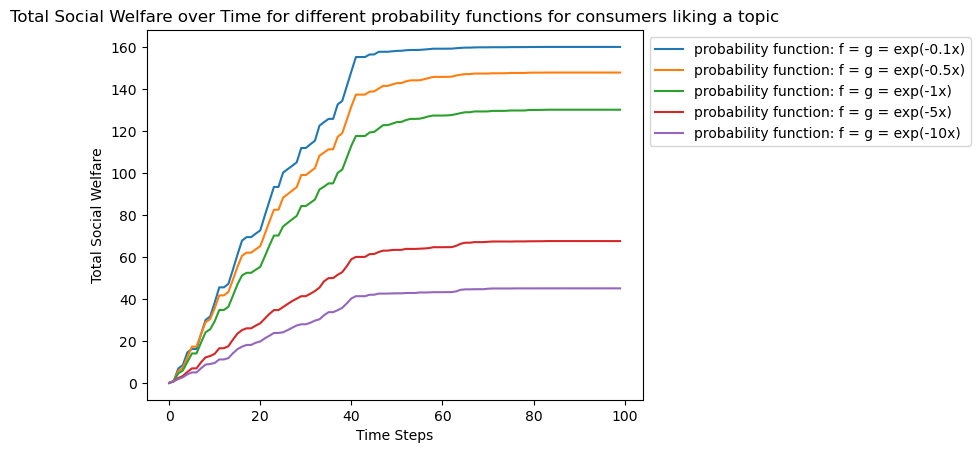

In [6]:
"""
VARYING PROBABILITY FUNCTION OF LIKING A TOPIC
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [0.1, 0.5, 1, 5, 10]:
    print(f"Modelling with probability function: f = g = exp(-{n}x)")

    f = lambda x: np.exp(-n * x)
    g = f

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = default_min_params,
        f = f,
        g = g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"probability function: f = g = exp(-{n}x)")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for different probability functions for consumers liking a topic")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with randomly generated initial rate allocations scaled to a factor of 0.1
Modelling with randomly generated initial rate allocations scaled to a factor of 0.5
Modelling with randomly generated initial rate allocations scaled to a factor of 0.7
Modelling with randomly generated initial rate allocations scaled to a factor of 0.85
Modelling with randomly generated initial rate allocations scaled to a factor of 1


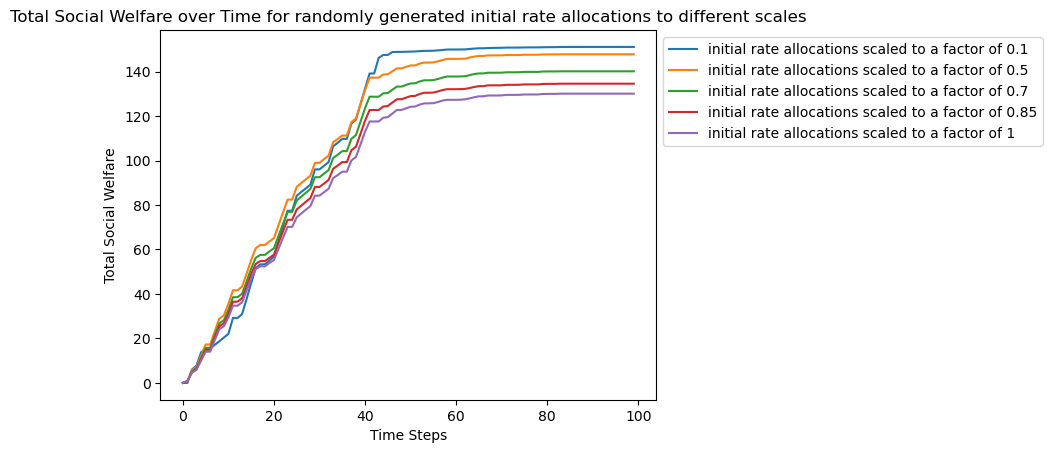

In [7]:
"""
VARYING THE SCALE OF RANDOMLY GENERATED INITIAL RATE ALLOCATIONS
"""

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()

for n in [0.1, 0.5, 0.7, 0.85, 1]:
    print(f"Modelling with randomly generated initial rate allocations scaled to a factor of {n}")

    main_topics = default_main_topics.copy()
    prod_topics = default_prod_topics.copy()
    infl_alloc = default_infl_alloc.copy()
    mems_alloc = default_mems_alloc.copy()

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics * n,
        prod_topics = prod_topics * n,
        infl_alloc = infl_alloc * n,
        mems_alloc = mems_alloc * n,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"initial rate allocations scaled to a factor of {n}")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for randomly generated initial rate allocations to different scales")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Modelling with uniform distribution
Modelling with beta distribution
Modelling with logistic distribution
Modelling with truncated_normal distribution


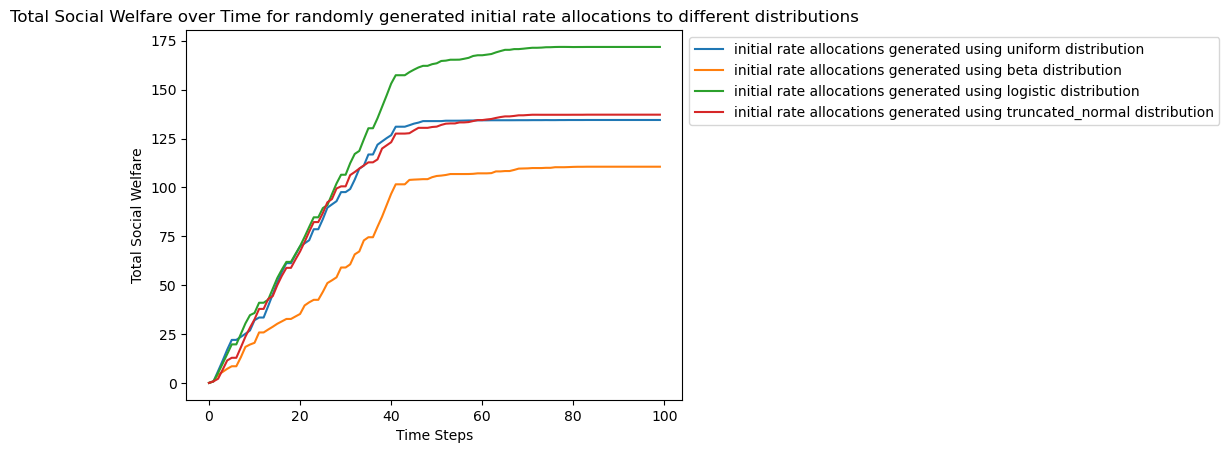

In [8]:
"""
TRYING OUT DIFFERENT INITIAL RATE ALLOCATIONS
"""
from scipy.stats import truncnorm

np.random.seed(0)
num_steps = 100

params = default_params.copy()
min_params = default_min_params.copy()
main_topics = default_main_topics.copy()

count = default_params['num_members']

prod_topics_dict = {
    'uniform': np.random.uniform(0, 1, count),
    'beta': np.random.beta(2, 5, size=count),
    'logistic': np.random.logistic(0.5, 0.05, size=count),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=count)
}
infl_alloc_dict = {
    'uniform': np.random.uniform(0, 1, count),
    'beta': np.random.beta(2, 5, size=count),
    'logistic': np.random.logistic(0.5, 0.05, size=count),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=count)
}
mems_alloc_dict = {
    'uniform': np.random.uniform(0, 1, size=(count, count+2)),
    'beta': np.random.beta(2, 5, size=(count, count+2)),
    'logistic': np.random.logistic(0.5, 0.05, size=(count, count+2)),
    'truncated_normal': truncnorm.rvs((0-0.5)/0.2, (1-0.5)/0.2, loc=0.5, scale=0.2, size=(count, count+2))
}

for dist in ['uniform', 'beta', 'logistic', 'truncated_normal']:
    print(f"Modelling with {dist} distribution")

    prod_topics = prod_topics_dict[dist]
    infl_alloc = infl_alloc_dict[dist]
    mems_alloc = mems_alloc_dict[dist]

    model = ContentMarketModel(
        params = params,
        main_topics = main_topics,
        prod_topics = prod_topics,
        infl_alloc = infl_alloc,
        mems_alloc = mems_alloc,
        min_params = min_params,
        f = default_f,
        g = default_g
    )

    for i in range(num_steps):
        model.step()

    agent_df = model.datacollector.get_agent_vars_dataframe()
    model_df = model.datacollector.get_model_vars_dataframe()

    plt.plot(model_df["Total Social Welfare"], label = f"initial rate allocations generated using {dist} distribution")
    
plt.xlabel("Time Steps")
plt.ylabel("Total Social Welfare")
plt.legend()
plt.title("Total Social Welfare over Time for randomly generated initial rate allocations to different distributions")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [26]:
"""
VISUALIZING THE CHANGE IN ALLOCATIONS OVER TIME
"""

import networkx as nx
from pyvis.network import Network
import ipywidgets as widgets
from IPython.display import display

np.random.seed(0)
num_steps = 100

params = default_params.copy()
params['verbose'] = False
params['M'] = 5.0
params['M_INFL'] = 25.0
params['num_members'] = 15
params['influencer_update_frequency'] = 2
min_params = default_min_params.copy()

main_topics = np.random.rand(params['num_members'])
prod_topics = np.random.rand(params['num_members'])
infl_alloc = np.random.rand(params['num_members'])
mems_alloc = np.random.rand(params['num_members'], params['num_members'] + 2)

model = ContentMarketModel(
    params = params,
    main_topics = main_topics,
    prod_topics = prod_topics,
    infl_alloc = infl_alloc,
    mems_alloc = mems_alloc,
    min_params = min_params,
    f = default_f,
    g = default_g
)

graph_data = []
prod_topics_arr = []

for step_num in range(num_steps):
    step_dict = {}
    for m in range(params['num_members']):
        for n in range(params['num_members'] + 1):
            if m != n:
                step_dict[(m, n)] = model.mems_alloc[m, n]
    
    for n in range(params['num_members']):
        step_dict[(params['num_members'], n)] = model.infl_alloc[n]

    prod_topics_arr.append(list(model.prod_topics))
        
    graph_data.append(step_dict)

    model.step()

In [27]:
def plot_graph(step):
    G = nx.DiGraph()
    for edge, weight_value in graph_data[step].items():
        G.add_edge(edge[0], edge[1], weight=weight_value)

    pos = nx.circular_layout(G)
    pos[params['num_members']] = np.array([0, 0])
    node_sizes = np.append(np.abs(prod_topics_arr[step] - np.mean(prod_topics_arr[step])), 1) * 2500
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', 
            edge_color='gray', width=[data['weight'] * 2.5 for _, _, data in G.edges(data=True)], 
            connectionstyle="arc3,rad=0.1")

    plt.title("Rate allocations for Step " + str(step))
    plt.show()

# Interactivity
steps = len(graph_data)
step_slider = widgets.IntSlider(value=0, min=0, max=steps-1, step=1, description='Step:')
widgets.interactive(plot_graph, step=step_slider)

interactive(children=(IntSlider(value=0, description='Step:', max=99), Output()), _dom_classes=('widget-intera…

In [45]:
from pyvis.network import Network
from IPython.display import display, HTML

def plot_graph(timestep=0):
    G = nx.DiGraph()
    for edge, weight in graph_data[timestep].items():
        G.add_edge(edge[0], edge[1], weight=weight)

    net = Network(notebook=True)

    net.from_nx(G)
    net.repulsion()

    net.show('example.html')

#steps = len(graph_data)
#step_slider = widgets.IntSlider(value=0, min=0, max=steps-1, step=1, description='Step:')
#widgets.interactive(plot_graph, step=step_slider)
widgets.interact(plot_graph, timestep=(0, len(graph_data) - 1))

interactive(children=(IntSlider(value=0, description='timestep', max=99), Output()), _dom_classes=('widget-int…

<function __main__.plot_graph(timestep=0)>